In [1]:
import numpy as np
import pandas as pd

In [2]:
# read the airbnb NYC listings csv file
airbnb = pd.read_csv("listings.csv")

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7631 entries, 0 to 7630
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7631 non-null   int64  
 1   name                            7631 non-null   object 
 2   host_id                         7631 non-null   int64  
 3   host_name                       7614 non-null   object 
 4   neighbourhood_group             7631 non-null   object 
 5   neighbourhood                   7631 non-null   object 
 6   latitude                        7631 non-null   float64
 7   longitude                       7631 non-null   float64
 8   room_type                       7631 non-null   object 
 9   price                           7631 non-null   int64  
 10  minimum_nights                  7631 non-null   int64  
 11  number_of_reviews               7631 non-null   int64  
 12  last_review                     65

In [5]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43817,12.32739,Entire home/apt,225,7,163,2019-06-26,1.54,3,351,1,NaN
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43977,12.32736,Entire home/apt,250,7,64,2016-07-17,0.67,3,347,0,NaN
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43896,12.32970,Entire home/apt,122,4,184,2018-09-17,1.53,3,362,0,NaN
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.43277,12.33456,Private room,200,1,411,2020-01-02,3.33,2,329,1,NaN
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.44569,12.32902,Entire home/apt,280,2,78,2021-08-24,1.41,1,258,6,NaN


In [7]:
# Results for a single column
airbnb['name']

0                        Venice Blue on Canal apartment
1                  Venice garden charme and canal view!
2                     Venice home to relax and emotions
3           Junior Suite with balcony overlooking canal
4       Historical Luxury Apartment on Calm Sunny Canal
                             ...                       
7626                 COMFY DOUBLE ROOM/PRIVATE BATHROOM
7627                    SPLENDID ROOM/ PRIVATE BATHROOM
7628                  CHARMING DOUBLE ROOM WITH BALCONY
7629             LOVELY ROOM/PRIVATE BATHROOM & BALCONY
7630            Portego del Drapier (L.T. M02704212221)
Name: name, Length: 7631, dtype: object

In [8]:
# results for multiple columns
hosts = airbnb[['host_id', 'host_name']]
hosts.head()

,host_id,host_name
0,15016,Francesca
1,15016,Francesca
2,15016,Francesca
3,116144,Giò&Giò
4,120215,Marc & Elisabeth


In [ ]:
#Analyzing Airbnb Data with pandas-What is the typical price for a listing? What is the difference in median price for different types of listings?
#How have these prices changed over time for each listing type? Finally, what is the distribution of typical listing prices?

In [11]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [14]:
# Change the type of a column to datetime
airbnb['last_review']=pd.to_datetime(airbnb['last_review'])
airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

In [15]:
# extract the year from a datetime series
airbnb['year'] = airbnb['last_review'].dt.year
airbnb['year'].head()

0    2019.0
1    2016.0
2    2018.0
3    2020.0
4    2021.0
Name: year, dtype: float64

In [16]:
# Strip leading and trailing spaces from a string series
airbnb['name'] = airbnb['name'].str.strip()
airbnb['name'].head()

0                     Venice Blue on Canal apartment
1               Venice garden charme and canal view!
2                  Venice home to relax and emotions
3        Junior Suite with balcony overlooking canal
4    Historical Luxury Apartment on Calm Sunny Canal
Name: name, dtype: object

In [17]:
# lowercase all strings in a series
airbnb['name_lower'] = airbnb['name'].str.lower()
airbnb['name_lower'].head()

0                     venice blue on canal apartment
1               venice garden charme and canal view!
2                  venice home to relax and emotions
3        junior suite with balcony overlooking canal
4    historical luxury apartment on calm sunny canal
Name: name_lower, dtype: object

In [ ]:
#calculating the minimum number of revenue a listing generates, by calculating the product
#of the minimum number of stays and the price per night.

In [45]:
# calculate using two columns, sorting by min revenue desc
airbnb_r=airbnb['min_revenue'] = airbnb['minimum_nights'] * airbnb['price']
airbnb_r=airbnb[['minimum_nights', 'price', 'min_revenue']]
airbnb_r.sort_values(by='min_revenue', ascending=False).head(10)

,minimum_nights,price,min_revenue
4594,365,299,109135
1355,400,130,52000
898,30,1250,37500
6427,365,100,36500
5520,5,3950,19750
5887,30,557,16710
1248,2,8000,16000
4417,13,1200,15600
5167,2,5200,10400
5237,1,9999,9999


In [26]:
# get the mean price
airbnb['price'].mean()

153.00445551041804

In [27]:
# get the median price
airbnb['price'].median()

113.0

In [35]:
# get the mean grouped by type of room
mean_roomt=airbnb[['room_type', 'price']].groupby('room_type', as_index=False).mean()
mean_roomt.head()

,room_type,price
0,Entire home/apt,163.990401
1,Hotel room,159.035714
2,Private room,105.511921
3,Shared room,327.342857


In [34]:
# get the median grouped by type of room
median_roomt=airbnb[['room_type', 'price']].groupby('room_type', as_index=False).median()
median_roomt.head()

,room_type,price
0,Entire home/apt,121.0
1,Hotel room,130.5
2,Private room,74.5
3,Shared room,39.0


In [46]:
# get the median grouped by type of room and year, sort by price
airbnb[['room_type', 'year', 'price']].groupby(['room_type', 'year'], as_index=False).median().sort_values(by='price', ascending=False)

,room_type,year,price
2,Entire home/apt,2013.0,213.0
14,Hotel room,2016.0,189.0
11,Hotel room,2013.0,165.0
3,Entire home/apt,2014.0,139.0
12,Hotel room,2014.0,139.0
18,Hotel room,2020.0,134.0
6,Entire home/apt,2017.0,133.0
0,Entire home/apt,2011.0,130.0
21,Private room,2014.0,130.0
5,Entire home/apt,2016.0,130.0


In [47]:
# get all rows with price < 1000
airbnb_under_1000 = airbnb[airbnb['price'] < 1000]
airbnb_under_1000.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,name_lower,min_revenue
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43817,12.32739,Entire home/apt,225,...,163,2019-06-26,1.54,3,351,1,NaN,2019.0,venice blue on canal apartment,1575
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43977,12.32736,Entire home/apt,250,...,64,2016-07-17,0.67,3,347,0,NaN,2016.0,venice garden charme and canal view!,1750
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43896,12.32970,Entire home/apt,122,...,184,2018-09-17,1.53,3,362,0,NaN,2018.0,venice home to relax and emotions,488
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.43277,12.33456,Private room,200,...,411,2020-01-02,3.33,2,329,1,NaN,2020.0,junior suite with balcony overlooking canal,200
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.44569,12.32902,Entire home/apt,280,...,78,2021-08-24,1.41,1,258,6,NaN,2021.0,historical luxury apartment on calm sunny canal,560


In [55]:
# get all rows with price < 1000 and year equal to 2020
airbnb.loc[(airbnb['price']<1000)&(airbnb['year']==2020)].head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,name_lower,min_revenue
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.43277,12.33456,Private room,200,...,411,2020-01-02,3.33,2,329,1,NaN,2020.0,junior suite with balcony overlooking canal,200
8,47549,Ca' Barba Apartment,215652,Caterina E Alessandro,Isole,Dorsoduro,45.43593,12.32521,Entire home/apt,136,...,145,2020-01-18,1.21,2,0,0,NaN,2020.0,ca' barba apartment,272
12,60007,Apartament alla Fenice a Venezia,288678,Furio,Isole,San Marco,45.43502,12.33372,Entire home/apt,150,...,159,2020-09-30,1.32,1,112,3,NaN,2020.0,apartament alla fenice a venezia,150
22,72740,Eco Venice 1,377929,Attilio,Terraferma,Favaro,45.50793,12.28336,Entire home/apt,85,...,315,2020-01-17,3.29,5,45,2,H0270420187,2020.0,eco venice 1,170
30,77188,Ca' Annalaura 1 with private court,390175,Monica,Isole,Castello,45.43294,12.34882,Entire home/apt,69,...,282,2020-07-12,2.47,2,214,19,NaN,2020.0,ca' annalaura 1 with private court,207
50,137087,"Charming & Bohémienne, a cozy stay in San Marco",264845,Ilaria,Isole,Castello,45.43704,12.34690,Entire home/apt,142,...,87,2020-01-03,0.79,1,241,2,NaN,2020.0,"charming & bohémienne, a cozy stay in san marco",284
61,148794,house of 500 canal view: a true Venetian feel,685618,Luisa,Isole,Cannaregio,45.44338,12.33133,Entire home/apt,90,...,167,2020-03-01,1.52,1,329,0,NaN,2020.0,house of 500 canal view: a true venetian feel,180
63,155015,nice and cozy open space apartment,745553,Rosanna E Francesca,Isole,Santa Croce,45.44085,12.32833,Entire home/apt,115,...,278,2020-01-02,2.51,6,335,3,NaN,2020.0,nice and cozy open space apartment,345
72,175509,Guest House BELLA ONDA (3x triple),848085,Valentina,Terraferma,Tessera,45.50346,12.32620,Hotel room,134,...,35,2020-01-24,0.48,5,364,2,NaN,2020.0,guest house bella onda (3x triple),134
111,303040,Venice-BB-Venezia (Deluxe room),1560575,Alessandro,Isole,Cannaregio,45.44477,12.32616,Private room,103,...,306,2020-03-09,2.91,4,39,1,NaN,2020.0,venice-bb-venezia (deluxe room),103


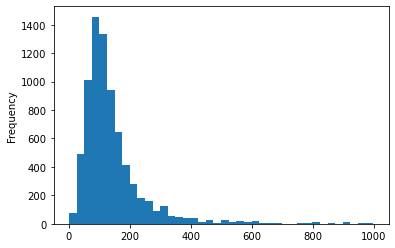

In [57]:
# distribution of prices under $1000
ax = airbnb_under_1000['price'].plot.hist(bins=40)